In [1]:
%cd ..

d:\~Perso\Etudes\DAC\NeuralNetworksDIY


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.linear import Linear
from src.losses import *
from utils.mltools import *


## Régression linéaire

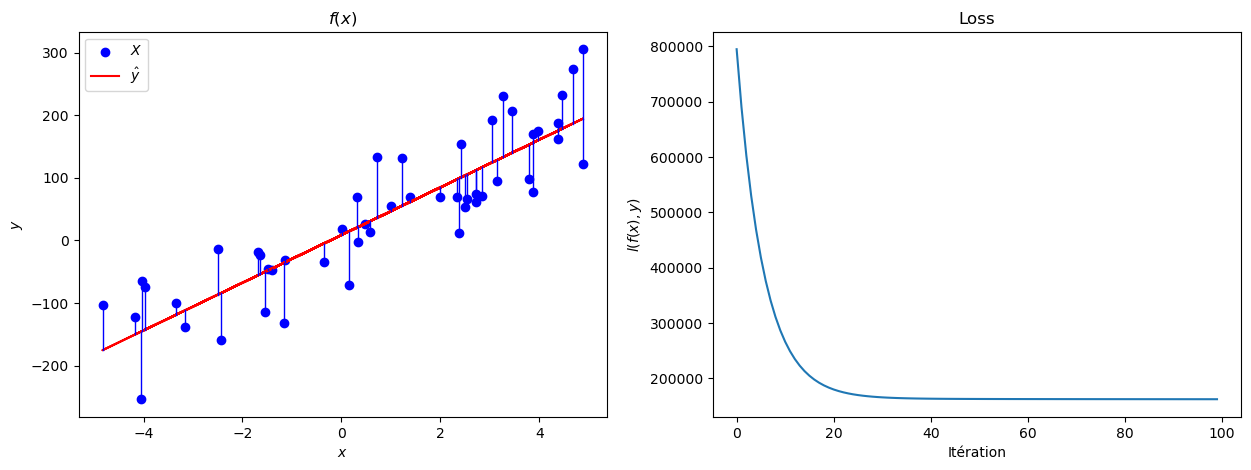

In [3]:
## Données
a = 42
b = 7
X = np.random.uniform(-5, 5, 50).reshape((-1, 1))
y = a * X + b + (np.random.uniform(-100, 100, 50).reshape((-1, 1)))
n = X.shape[1]
d = 1

## Régression linéaire
### Paramètres
iter = 100
gradient_step = 1e-4
loss = MSELoss()
layer = Linear(n, d)

### Algorithme
losses = []
for _ in range(iter):
    # forward
    hidden = layer.forward(X)
    # backward
    losses.append(loss.forward(y, hidden).mean())
    loss_back = loss.backward(y, hidden)
    delta_linear = layer.backward_delta(X, loss_back)
    layer.backward_update_gradient(X, loss_back)
    layer.update_parameters(gradient_step=gradient_step)
    layer.zero_grad()

### Prédiction
y_pred = layer.forward(X)

## Graphiques
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].scatter(X, y, color="b", label="$X$")
ax[0].plot(X, y_pred, color="red", label="$\hat{y}$")
for i in range(len(X)):
    ax[0].plot([X[i], X[i]], [y[i], y_pred[i]], c="b", linewidth=1)
ax[0].legend()
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("$f(x)$")
ax[1].plot(np.arange(iter), losses)
ax[1].set_title("Loss")
ax[1].set_xlabel("Itération")
ax[1].set_ylabel("$l(f(x), y)$")
plt.show()


## Données linéairement séparables
### Peu bruitées

Accuracy en train : 1.0
Accuracy en test : 1.0


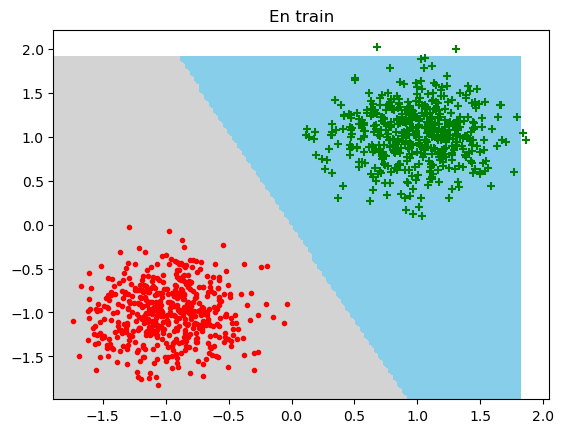

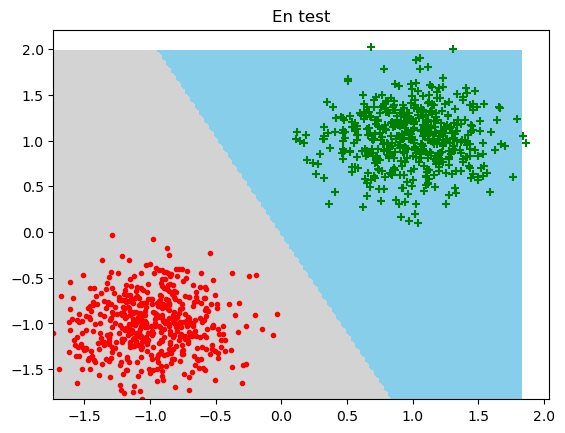

In [4]:
## Données
X_train, y_train = gen_arti(nbex=1000, data_type=0, epsilon=0.02)
X_test, y_test = gen_arti(nbex=1000, data_type=0, epsilon=0.02)
n = X_train.shape[1]
d = 1

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

### Paramètres
iteration = 100
gradient_step = 1e-4
loss = MSELoss()
layer = Linear(n, d)

### Algorithme
for _ in range(iteration):
    # forward
    hidden = layer.forward(X_train)
    # backward
    loss_back = loss.backward(y_train, hidden)
    delta_linear = layer.backward_delta(X_train, loss_back)
    layer.backward_update_gradient(X_train, loss_back)
    layer.update_parameters(gradient_step=gradient_step)
    layer.zero_grad()

def predict(X):
    hidden = layer.forward(X)
    return np.where(hidden >= 0.5, 1, 0)

score_train = (y_train == predict(X_train)).mean()
score_test = (y_test == predict(X_test)).mean()
print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")


plot_frontiere(X_train, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En train")
plt.show()

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En test")
plt.show()

### Très bruitées

Accuracy en train : 0.992
Accuracy en test : 0.991


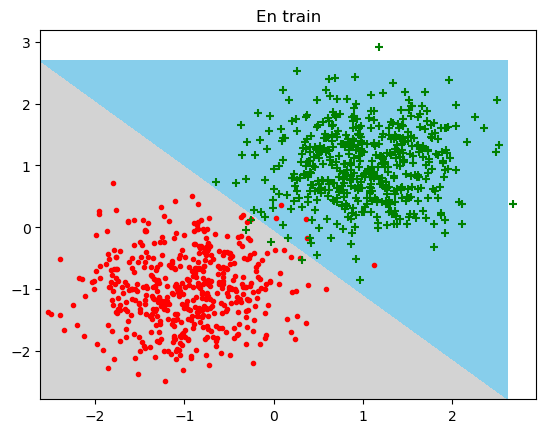

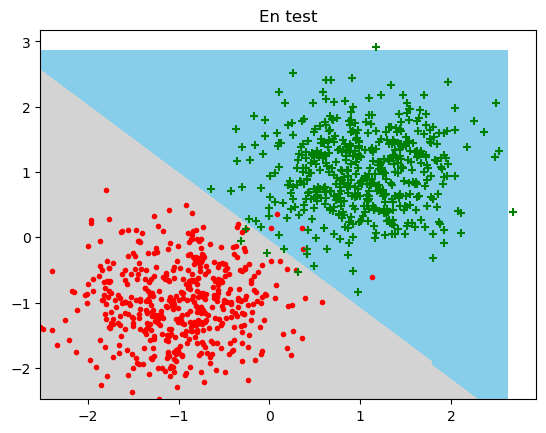

In [5]:
## Données
X_train, y_train = gen_arti(nbex=1000, data_type=0, epsilon=0.5)
X_test, y_test = gen_arti(nbex=1000, data_type=0, epsilon=0.5)
n = X_train.shape[1]
d = 1

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

### Paramètres
iteration = 100
gradient_step = 1e-4
loss = MSELoss()
layer = Linear(n, d)

### Algorithme
for _ in range(iteration):
    # forward
    hidden = layer.forward(X_train)
    # backward
    loss_back = loss.backward(y_train, hidden)
    delta_linear = layer.backward_delta(X_train, loss_back)
    layer.backward_update_gradient(X_train, loss_back)
    layer.update_parameters(gradient_step=gradient_step)
    layer.zero_grad()

def predict(X):
    hidden = layer.forward(X)
    return np.where(hidden >= 0.5, 1, 0)

score_train = (y_train == predict(X_train)).mean()
score_test = (y_test == predict(X_test)).mean()
print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")


plot_frontiere(X_train, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En train")
plt.show()

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En test")
plt.show()